# Проект: промышленность

Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Заказчик хочет использовать разработанную модель для имитации технологического процесса.


**Цель исследования:** построить модель, которая будет предсказывать температуру сплава. 

**Описание данных:**

Данные состоят из нескольких файлов, полученных из разных источников:
- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).


**Файл data_arc_new.csv**
- `key` — номер партии;
- `Начало нагрева дугой` — время начала нагрева;
- `Конец нагрева дугой` — время окончания нагрева;
- `Активная мощность` — значение активной мощности;
- `Реактивная мощность` — значение реактивной мощности.


**Файл data_bulk_new.csv**
- `key` — номер партии;
- `Bulk 1 … Bulk 15` — объём подаваемого материала.


**Файл data_bulk_time_new.csv**
- `key` — номер партии;
- `Bulk 1 … Bulk 15` — время подачи материала.


**Файл data_gas_new.csv**
- `key` — номер партии;
- `Газ 1` — объём подаваемого газа.


**Файл data_temp_new.csv**
- `key` — номер партии;
- `Время замера` — время замера;
- `Температура` — значение температуры.


**Файл data_wire_new.csv**
- `key` — номер партии;
- `Wire 1 … Wire 9` — объём подаваемых проволочных материалов.


**Файл data_wire_time_new.csv**
- `key` — номер партии;
- `Wire 1 … Wire 9` — время подачи проволочных материалов.


Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

**План работы:**
- Шаг 1. Загрузка данных. Загрузим данные и выполним их первичный осмотр.
- Шаг 2. Исследовательский анализ и предобработка данных. Выполним исследовательский анализ каждого датафрейма и при необходимости выполним предобработку. Сделаем выводы об имеющихся признаках: понадобятся ли они для обучения моделей.
- Шаг 3. Объединение данных. Объедините выбранных признаков в один датафрейм по ключу.
- Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма. Выполним исследовательский анализ объединённого датафрейма, визуализируем распределения признаков и при необходимости выполним предобработку. Проведем корреляционный анализ. При необходимости сгенерируем новые признаки.
- Шаг 5. Подготовка данных. Выполним подготовку данных для обучения модели. Разделим данные на две выборки, при масштабировании и кодировании учтем особенности данных и моделей.
- Шаг 6. Обучение моделей машинного обучения. Обучим как минимум две модели. Хотя бы для одной из них подберем как минимум два гиперпараметра.
- Шаг 7. Выбор лучшей модели. Выберем лучшую модель и проверим её качество на тестовой выборке.
- Шаг 8. Общий вывод и рекомендации заказчику. Сделаем общий вывод о проделанной работе: опишем основные этапы работы, полученные результаты и дадим рекомендации для бизнеса.

## Загрузка данных

Импортируем библиотеки.

In [1]:
#установим библиотеки
!pip install scikit-learn==1.4.0
!pip install phik -q

#стандартные библиотеки
import os
import pandas as pd 
import numpy as np

#библиотеки для построения графиков
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

#класс для разделения на выборки
from sklearn.model_selection import train_test_split 

#загружаем классы для подготовки данных
from sklearn.preprocessing import StandardScaler

# загружаем функцию для работы с метриками
from sklearn.metrics import make_scorer, mean_absolute_error

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.dummy import DummyRegressor

#константы
RANDOM_STATE = 42

Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [2]:
pth11=['/Users/margarita/Desktop/datasets/data_arc_new.csv']
pth12=['/datasets/data_arc_new.csv']

pth21=['/Users/margarita/Desktop/datasets/data_bulk_new.csv']
pth22=['/datasets/data_bulk_new.csv']

pth31=['/Users/margarita/Desktop/datasets/data_bulk_time_new.csv']
pth32=['/datasets/data_bulk_time_new.csv']

pth41=['/Users/margarita/Desktop/datasets/data_gas_new.csv']
pth42=['/datasets/data_gas_new.csv']

pth51=['/Users/margarita/Desktop/datasets/data_temp_new.csv']
pth52=['/datasets/data_temp_new.csv']

pth61=['/Users/margarita/Desktop/datasets/data_wire_new.csv']
pth62=['/datasets/data_wire_new.csv']

pth71=['/Users/margarita/Desktop/datasets/data_wire_time_new.csv']
pth72=['/datasets/data_wire_time_new.csv']

if os.path.exists(pth11[0]):
    data_arc_new = pd.read_csv(pth11[0])
elif os.path.exists(pth12[0]):
    data_arc_new = pd.read_csv(pth12[0])
else:
    print('Something is wrong in data_arc_new')

if os.path.exists(pth21[0]):
    data_bulk_new = pd.read_csv(pth21[0])
elif os.path.exists(pth22[0]):
    data_bulk_new = pd.read_csv(pth22[0])
else:
    print('Something is wrong in data_bulk_new')
    
if os.path.exists(pth31[0]):
    data_bulk_time_new = pd.read_csv(pth31[0])
elif os.path.exists(pth32[0]):
    data_bulk_time_new = pd.read_csv(pth32[0])
else:
    print('Something is wrong in data_bulk_time_new')
    
if os.path.exists(pth41[0]):
    data_gas_new = pd.read_csv(pth41[0])
elif os.path.exists(pth42[0]):
    data_gas_new = pd.read_csv(pth42[0])
else:
    print('Something is wrong in data_gas_new')
    
if os.path.exists(pth51[0]):
    data_temp_new = pd.read_csv(pth51[0])
elif os.path.exists(pth52[0]):
    data_temp_new = pd.read_csv(pth52[0])
else:
    print('Something is wrong in data_temp_new')
    
if os.path.exists(pth61[0]):
    data_wire_new = pd.read_csv(pth61[0])
elif os.path.exists(pth62[0]):
    data_wire_new = pd.read_csv(pth62[0])
else:
    print('Something is wrong in data_wire_new')
    
if os.path.exists(pth71[0]):
    data_wire_time_new = pd.read_csv(pth71[0])
elif os.path.exists(pth72[0]):
    data_wire_time_new = pd.read_csv(pth72[0])
else:
    print('Something is wrong in data_wire_time_new')

Выполним первичный обзор данных.

In [3]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [4]:
data_bulk_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [5]:
data_bulk_time_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [6]:
data_gas_new.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [7]:
data_temp_new.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [8]:
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_wire_time_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Выводы:**
- Был произведен импорт библиотек и загрузка данных из датасетов `data_arc_new`, `data_bulk_new`, `data_bulk_time_new`, `data_gas_new`, `data_temp_new`, `data_wire_new` и `data_wire_time_new`. Названия столбцов достаточно информативны и не требуют переименования.

## Исследовательский анализ и предобработка данных

Изучим общую информацию о датафреймах. Преобразуем данные в корректные типы.

In [10]:
def about_data(data):
    display(data.head())
    print('\nРазмер датафрейма:', data.shape)
    print('\nОбщая информация о датафрейме:')
    data.info()
    
    print('\nПроверка на наличие пропусков:')
    print(data.isna().sum())
    
    print('\nПроверка на наличие явных дубликатов:')
    print(data.duplicated().sum())
    
   # print('\nПроверка уникальных значений:')
   # for column in data.columns:
   #     print(column, '\n', data[column].unique(), '\n')
        
    print('\nВывод описательных статистик:')
    display(data.describe())

In [11]:
about_data(data_arc_new)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691



Размер датафрейма: (14876, 5)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB

Проверка на наличие пропусков:
key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Проверка на наличие явных дубликатов:
0

Вывод описательных статистик:


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


В датафрейме `data_arc_new` содержится 14876 записей. Пропуски в данных отсутствуют. Приведем время к корректному типу.

In [12]:
data_arc_new['Начало нагрева дугой'] = pd.to_datetime(data_arc_new['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc_new['Конец нагрева дугой'] = pd.to_datetime(data_arc_new['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


Можно заметить аномальное отрицательное значение реактивной мощности. Построим боксплоты для значений `Активная мощность`, `Реактивная мощность`.

In [13]:
def plot_stat(data, col_names):
    for col in col_names:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,3))
        axes[0] = data[col].plot(kind='hist', bins=15, ax=axes[0], alpha=0.9)

        axes[0].set_title(f'Гистограмма распределения признака {col}')
        axes[0].set_xlabel(f'{col}')
        axes[0].set_ylabel('Количество')
    
        data[col].plot(kind='box', ax=axes[1])
        axes[1].set_title(f'Разброс значений признака {col}')
        axes[1].set_ylabel('Значение признака')
        plt.show()

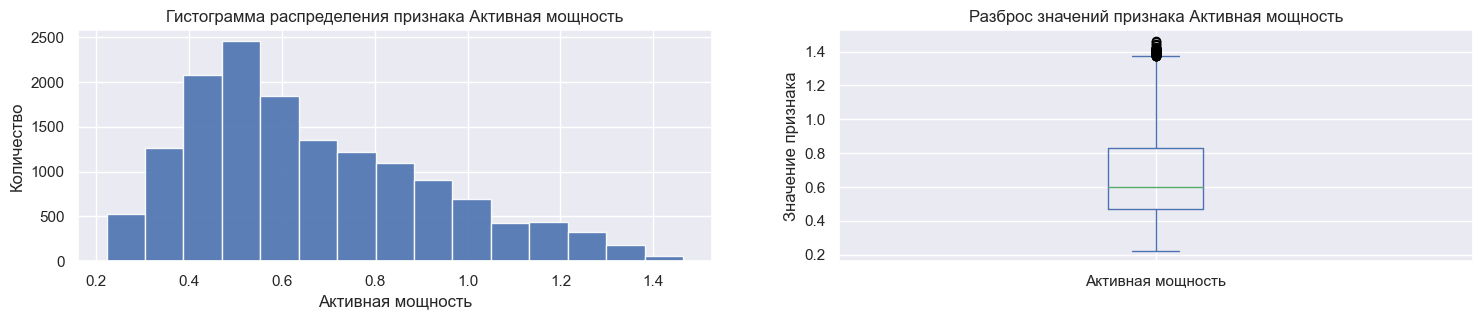

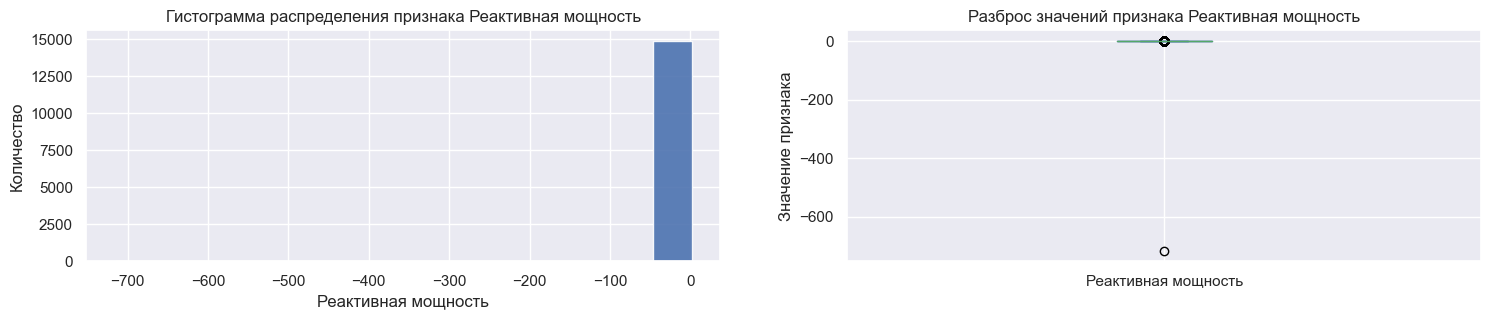

In [14]:
col_names = ['Активная мощность', 'Реактивная мощность']
plot_stat(data_arc_new, col_names)

Рассмотрим данный выброс.

In [15]:
data_arc_new.loc[data_arc_new['Реактивная мощность'] < 0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


In [16]:
data_arc_new.loc[data_arc_new['key'] == 2116]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


Заменим выброс средним по остальным значениям данной партии.

In [17]:
data_arc_new.loc[(data_arc_new['key'] == 2116) & (data_arc_new['Реактивная мощность'] < 0), 'Реактивная мощность'] = \
 data_arc_new.loc[(data_arc_new['key'] == 2116) & (data_arc_new['Реактивная мощность'] > 0), 'Реактивная мощность'].mean()

In [18]:
data_arc_new.loc[data_arc_new['key'] == 2116]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,0.504631
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


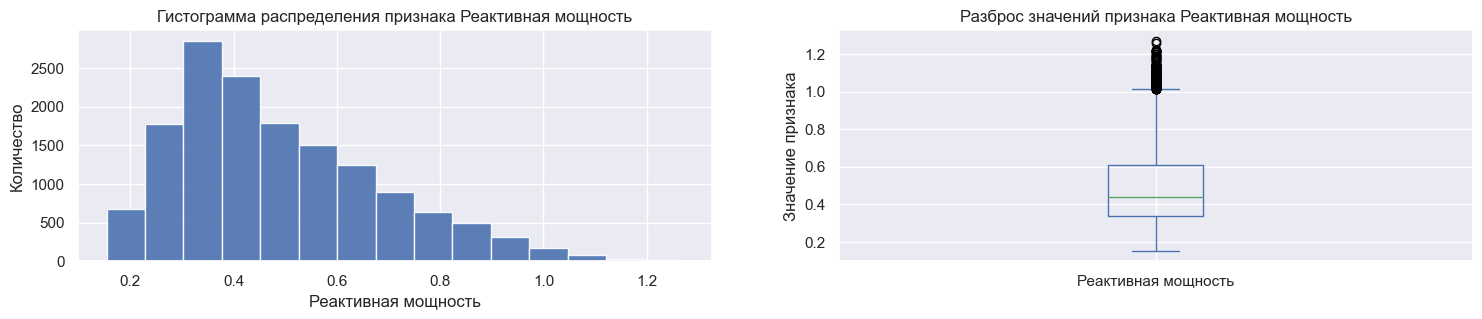

In [19]:
col_names = ['Реактивная мощность']
plot_stat(data_arc_new, col_names)

Добавим новые признаки в датасет: `Полная мощность`, `Время нагрева дугой`, `Затраты электроэнергии`.

In [20]:
data_arc_new['Полная мощность'] = (data_arc_new['Активная мощность']**2 + data_arc_new['Реактивная мощность']**2)**(0.5)

#время нагрева в секундах
data_arc_new['Время нагрева дугой'] = (data_arc_new['Конец нагрева дугой'] - data_arc_new['Начало нагрева дугой']).astype(int)/10**9

data_arc_new['Затраты электроэнергии'] = data_arc_new['Полная мощность']*data_arc_new['Время нагрева дугой']

In [21]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Затраты электроэнергии
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228.0,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185.0,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172.0,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365.0,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148.0,159.830252


In [22]:
data_arc_new.describe()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Затраты электроэнергии
count,14876.000000,14876,14876,14876.000000,14876.000000,14876.000000,14876.000000,14876.000000
mean,1615.220422,2019-07-05 12:25:51.921081088,2019-07-05 12:28:43.592027392,0.662752,0.487117,0.823387,171.670946,141.643832
min,1.000000,2019-05-03 11:02:14,2019-05-03 11:06:02,0.223120,0.153777,0.275718,11.000000,6.409531
25%,806.000000,2019-06-03 23:18:23.249999872,2019-06-03 23:21:35,0.467115,0.337192,0.578847,107.000000,71.158372
50%,1617.000000,2019-07-03 01:31:26.500000,2019-07-03 01:35:13,0.599587,0.441667,0.746591,147.000000,114.462623
75%,2429.000000,2019-08-07 22:52:20.750000128,2019-08-07 22:56:47,0.830070,0.608201,1.030390,214.000000,181.345716
max,3241.000000,2019-09-06 17:24:54,2019-09-06 17:26:15,1.463773,1.270284,1.898158,907.000000,1084.729420
std,934.571502,NaN,NaN,0.258885,0.197606,0.323459,98.186803,103.197631


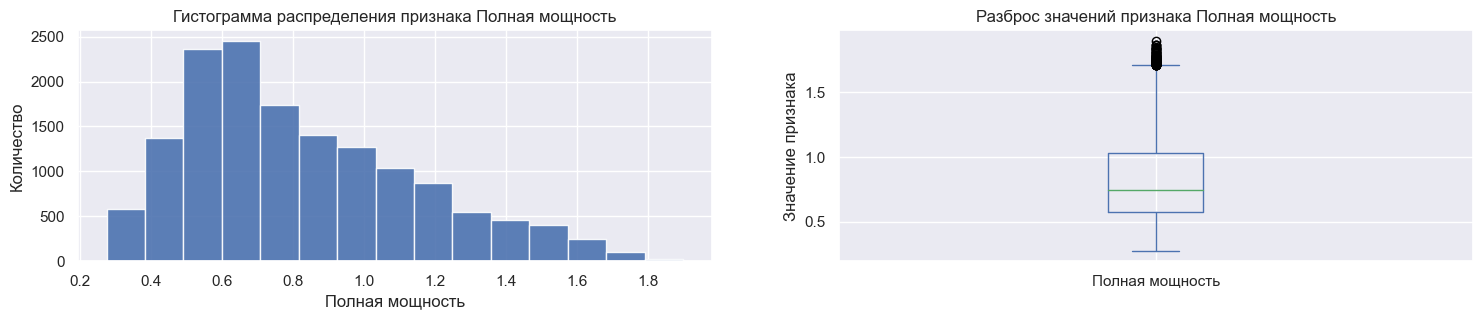

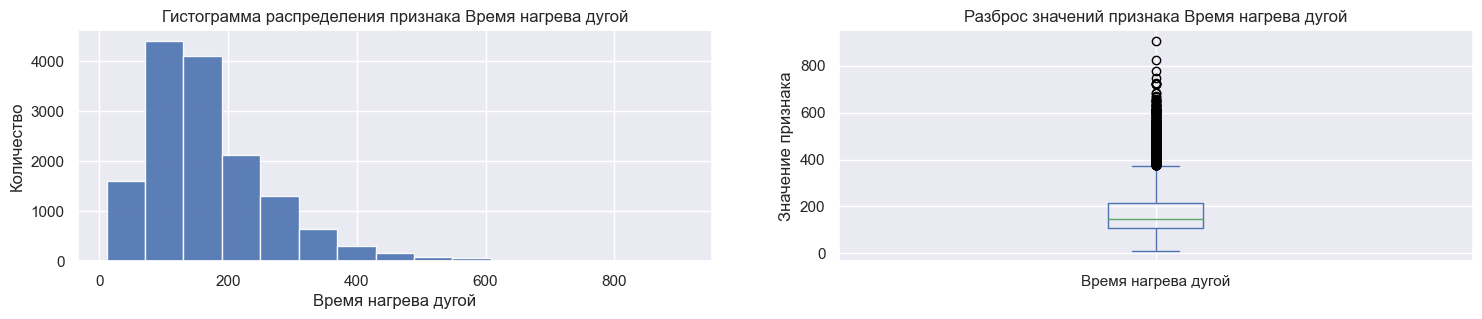

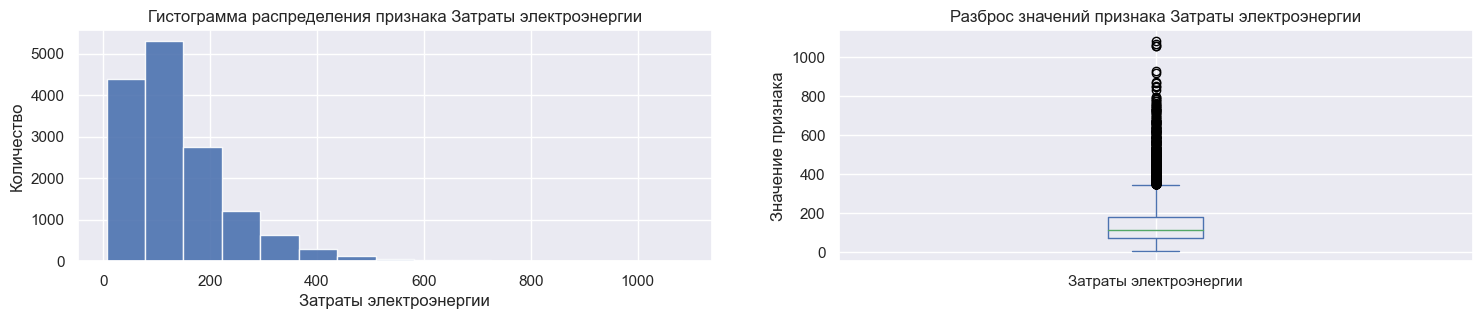

In [23]:
col_names = ['Полная мощность', 'Время нагрева дугой', 'Затраты электроэнергии']
plot_stat(data_arc_new, col_names)

Для каждой партии посчитаем среднее значение мощности. Посчитаем затраченную электроэнергию суммировав затраты на каждую партию.

In [24]:
arc_columns = {
    'key' : 'count', 
    'Начало нагрева дугой' : 'min',
    'Конец нагрева дугой' : 'max',
    'Активная мощность' : 'mean',
    'Реактивная мощность' : 'mean',
    'Полная мощность' : 'mean',
    'Время нагрева дугой' : 'sum',
    'Затраты электроэнергии' : 'sum'}

data_arc = data_arc_new.groupby('key').agg(arc_columns).rename(columns={'key':'Количество циклов нагрева'})

In [25]:
#время выделим в отдельный датасет
data_arc_new_time = data_arc[['Начало нагрева дугой', 'Конец нагрева дугой']]

In [26]:
data_arc.drop(['Начало нагрева дугой', 'Конец нагрева дугой'], axis=1, inplace=True)

In [27]:
data_arc.head()

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Затраты электроэнергии
key,,,,,,
1,5,0.607346,0.428564,0.743747,1098.0,770.282114
2,4,0.534852,0.363339,0.647087,811.0,481.760005
3,5,0.812728,0.587491,1.003845,655.0,722.837668
4,4,0.676622,0.514248,0.850010,741.0,683.455597
5,4,0.563238,0.421998,0.704245,869.0,512.169934


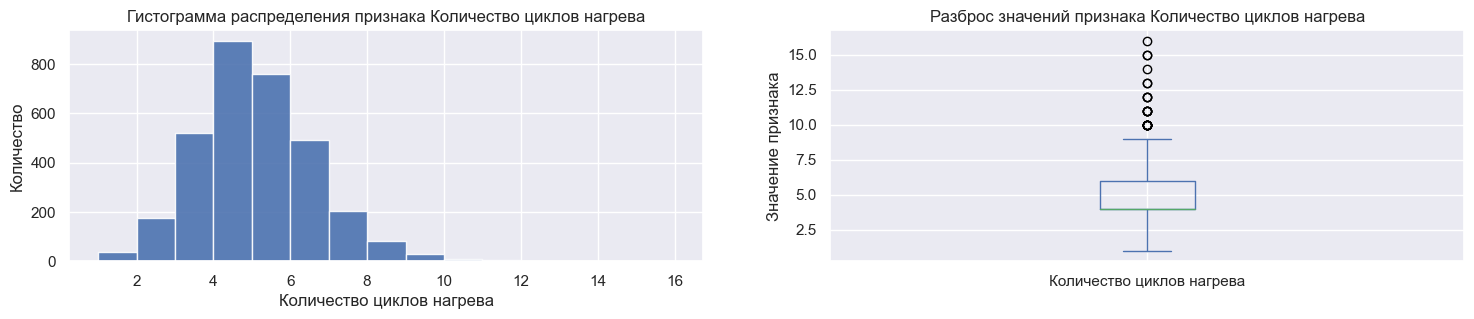

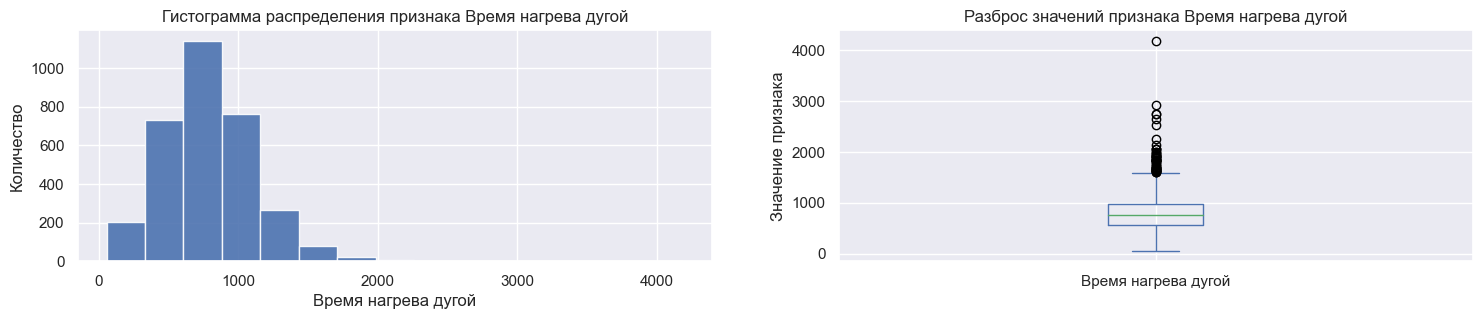

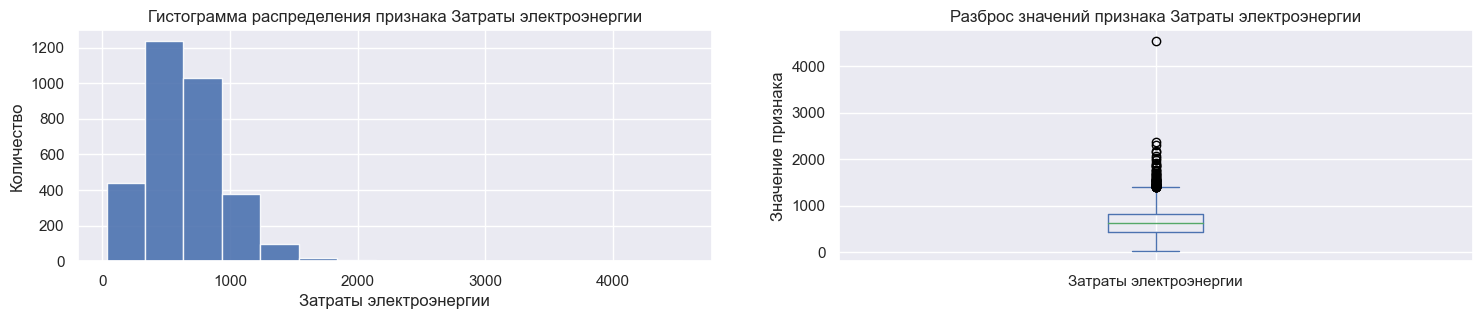

In [28]:
col_names = ['Количество циклов нагрева', 'Время нагрева дугой', 'Затраты электроэнергии']
plot_stat(data_arc, col_names)

Наблюдаем некоторое количество аномально больших значений суммарного времени нагрева по каждой партии. Изучим партии с временем более 2000 с.

In [29]:
data_arc.loc[data_arc['Время нагрева дугой'] > 2000].sort_values(by='Количество циклов нагрева', ascending=False)

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Затраты электроэнергии
key,,,,,,
2108,16,0.669175,0.474343,0.820929,2739.0,2151.752807
1513,15,0.775490,0.571533,0.964436,2526.0,2380.879281
1689,15,0.825042,0.596603,1.019218,4189.0,4546.405812
46,13,0.706174,0.542457,0.891672,2919.0,2306.073920
322,13,0.685754,0.504934,0.851966,2658.0,2026.007227
44,12,0.608250,0.435102,0.748429,2063.0,1393.802417
638,11,0.661000,0.452892,0.801596,2067.0,1654.779561
1880,11,0.559006,0.387556,0.680447,2755.0,1851.427463
2917,11,0.586461,0.453019,0.741930,2006.0,1224.527008


Есть статистические выбросы по времени нагрева дугой. Видимо, добиваясь требуемого качества, приходилось много раз повторять цикл, увеличивая при этом время нагрева. Чтобы модель работала в реальных параметрах, удалять данные не будем.

Рассмотрим остальные датасеты.

In [30]:
about_data(data_bulk_new)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



Размер датафрейма: (3129, 16)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.3 KB

Проверка на наличие пропусков:
key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     18

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Заполним пропуски в датасете `data_bulk_new`. Введем дополнительный признак `Bulk total` общего объема добавленного материала.

In [31]:
data_bulk_new = data_bulk_new.set_index('key')
data_bulk_new = data_bulk_new.fillna(0)

In [32]:
data_bulk_new['Bulk total'] = data_bulk_new.sum(axis=1)
data_bulk_new = data_bulk_new.astype(int)
data_bulk_new.head()

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Bulk total
key,,,,,,,,,,,,,,,,
1,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154,553
2,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154,582
3,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153,544
4,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154,595
5,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152,584


Рассмотрим датасет `data_bulk_time_new`.

In [33]:
about_data(data_bulk_time_new)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47



Размер датафрейма: (3129, 16)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.3+ KB

Проверка на наличие пропусков:
key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [34]:
data_bulk_time_new = data_bulk_time_new.set_index('key')

In [35]:
columns = data_bulk_time_new.columns.to_list()

for column in columns:
    data_bulk_time_new[column] = pd.to_datetime(data_bulk_time_new[column], format='%Y-%m-%d %H:%M:%S')

data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3129 entries, 1 to 3241
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Bulk 1   252 non-null    datetime64[ns]
 1   Bulk 2   22 non-null     datetime64[ns]
 2   Bulk 3   1298 non-null   datetime64[ns]
 3   Bulk 4   1014 non-null   datetime64[ns]
 4   Bulk 5   77 non-null     datetime64[ns]
 5   Bulk 6   576 non-null    datetime64[ns]
 6   Bulk 7   25 non-null     datetime64[ns]
 7   Bulk 8   1 non-null      datetime64[ns]
 8   Bulk 9   19 non-null     datetime64[ns]
 9   Bulk 10  176 non-null    datetime64[ns]
 10  Bulk 11  177 non-null    datetime64[ns]
 11  Bulk 12  2450 non-null   datetime64[ns]
 12  Bulk 13  18 non-null     datetime64[ns]
 13  Bulk 14  2806 non-null   datetime64[ns]
 14  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15)
memory usage: 391.1 KB


Рассмотрим датасет `data_gas_new`.

In [36]:
about_data(data_gas_new)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



Размер датафрейма: (3239, 2)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB

Проверка на наличие пропусков:
key      0
Газ 1    0
dtype: int64

Проверка на наличие явных дубликатов:
0

Вывод описательных статистик:


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [37]:
data_gas_new = data_gas_new.set_index('key')

Рассмотрим датасет `data_temp_new`. Отметим время первого и последнего замера температуры.

In [38]:
about_data(data_temp_new)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0



Размер датафрейма: (18092, 3)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB

Проверка на наличие пропусков:
key                0
Время замера       0
Температура     3427
dtype: int64

Проверка на наличие явных дубликатов:
0

Вывод описательных статистик:


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


Проверим, есть ли в датасете партии с одним циклом замера температуры. Если будут такие партии, исключим их.

In [39]:
columns = {'key' : 'count'}
data_temp_new__ = data_temp_new.groupby('key').agg(columns).rename(columns={'key':'Количество циклов замера температуры'})
data_temp_new__.loc[data_temp_new__['Количество циклов замера температуры']==1]

,Количество циклов замера температуры
key,
195,1
279,1


In [40]:
data_temp_new = data_temp_new.set_index('key')

In [41]:
data_temp_new = data_temp_new.drop(index=[195,279])

Переведем время в корректный тип.

In [42]:
data_temp_new['Время замера'] = pd.to_datetime(data_temp_new['Время замера'], format='%Y-%m-%d %H:%M:%S')
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18090 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Время замера  18090 non-null  datetime64[ns]
 1   Температура   14663 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 424.0 KB


In [43]:
data_temp_new.head(10)

,Время замера,Температура
key,,
1,2019-05-03 11:02:04,1571.0
1,2019-05-03 11:07:18,1604.0
1,2019-05-03 11:11:34,1618.0
1,2019-05-03 11:18:04,1601.0
1,2019-05-03 11:25:59,1606.0
1,2019-05-03 11:30:38,1613.0
2,2019-05-03 11:34:04,1581.0
2,2019-05-03 11:38:40,1577.0
2,2019-05-03 11:46:09,1589.0


In [44]:
temp_time = data_temp_new
temp_time['Время начального замера температуры'] = temp_time['Время замера']
temp_time['Время последнего замера температуры'] = temp_time['Время замера']
temp_time_columns = {'Время начального замера температуры' : 'first', 'Время последнего замера температуры' : 'last'}
temp_time = temp_time.groupby('key').agg(temp_time_columns)
temp_time.head()

,Время начального замера температуры,Время последнего замера температуры
key,,
1,2019-05-03 11:02:04,2019-05-03 11:30:38
2,2019-05-03 11:34:04,2019-05-03 11:55:09
3,2019-05-03 12:06:44,2019-05-03 12:35:57
4,2019-05-03 12:39:27,2019-05-03 12:59:47
5,2019-05-03 13:11:03,2019-05-03 13:36:39


В замерах температуры имелись пропуски. Удалим те партии, в которых наблюдались пропуски в замерах температуры. Заменим пропуски в значениях температуры на 0. В тех партиях, в которых пропуски заменили на 0, минимальное значение температуры будет равно 0.

In [45]:
data_temp_new = data_temp_new.fillna(0)

Найдем минимальную температуру для каждой партии. Исключим последние циклы для каждой партии, чтобы не учитывать конечную температуру.

In [46]:
data_temp_new_ = data_temp_new
data_temp_new_ = data_temp_new_.reset_index()
mas = pd.DataFrame(columns = data_temp_new_.columns)

for key in data_temp_new_['key'].unique():
    mas = pd.concat([mas, data_temp_new_.loc[data_temp_new_['key']==key][:-1]], ignore_index=True)

In [47]:
mas['Минимальная температура'] = mas['Температура']
temp_columns = {'Минимальная температура' : 'min'}
mas = mas.groupby('key').agg(temp_columns)

mas.head()

,Минимальная температура
key,
1,1571.0
2,1577.0
3,1596.0
4,1601.0
5,1576.0


Найдем начальную и конечную температуру для каждой партии.

In [48]:
data_temp_new['Начальная температура'] = data_temp_new['Температура']
data_temp_new['Конечная температура'] = data_temp_new['Температура']
temp_columns = {'Начальная температура' : 'first', 'Конечная температура' : 'last'}
data_temp_new = data_temp_new.groupby('key').agg(temp_columns)
data_temp_new['Начальная температура'] = data_temp_new['Начальная температура'].astype(int)
data_temp_new['Конечная температура'] = data_temp_new['Конечная температура'].astype(int)

data_temp_new.head()

,Начальная температура,Конечная температура
key,,
1,1571,1613
2,1581,1602
3,1596,1599
4,1601,1625
5,1576,1602


Объединим данные по температуре в один датасет.

In [49]:
data_temp_new_new = pd.concat([mas, data_temp_new], axis=1)

data_temp_new_new = data_temp_new_new.loc[data_temp_new_new['Минимальная температура'] > 0]
data_temp_new_new = data_temp_new_new.loc[data_temp_new_new['Конечная температура'] > 0]
data_temp_new_new['Минимальная температура'] = data_temp_new_new['Минимальная температура'].astype(int)

data_temp_new_new.head()

,Минимальная температура,Начальная температура,Конечная температура
key,,,
1,1571,1571,1613
2,1577,1581,1602
3,1596,1596,1599
4,1601,1601,1625
5,1576,1576,1602


Рассмотрим распределение температур.

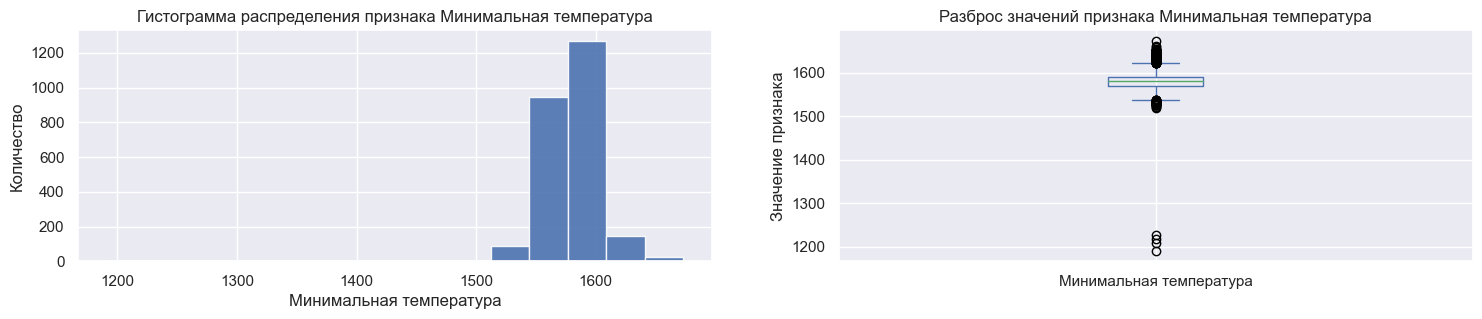

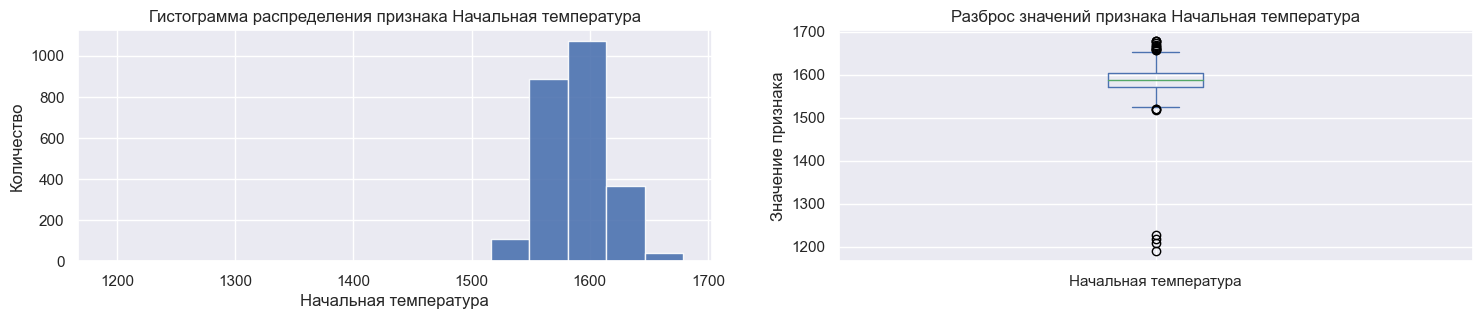

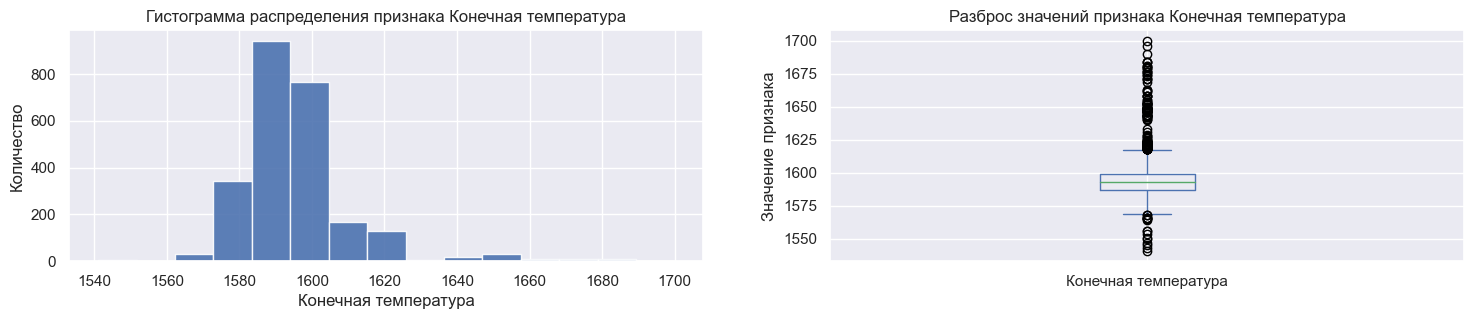

In [50]:
col_names = ['Минимальная температура', 'Начальная температура', 'Конечная температура']
plot_stat(data_temp_new_new, col_names)

В данных имеются аномалии по температурам. Исключим их.

In [51]:
data_temp_new_new.loc[data_temp_new_new['Начальная температура'] < 1300]

,Минимальная температура,Начальная температура,Конечная температура
key,,,
867,1191,1191,1599
1214,1208,1208,1591
1619,1218,1218,1590
2052,1227,1227,1592


In [52]:
data_temp_new_new = data_temp_new_new.loc[data_temp_new_new['Начальная температура'] >= 1300]

In [53]:
data_temp_new_new.isna().sum()

Минимальная температура    0
Начальная температура      0
Конечная температура       0
dtype: int64

Конечная температура является целевым признаком по требованию заказчика.

Рассмотрим датасеты `data_wire_new` и `data_wire_time_new`. Отметим время первого и последнего замера температуры.

In [54]:
about_data(data_wire_new)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Размер датафрейма: (3081, 10)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB

Проверка на наличие пропусков:
key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Проверка на наличие явных дубликатов:
0

Вывод описательных статистик:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [55]:
data_wire_new = data_wire_new.set_index('key')

In [56]:
data_wire_new = data_wire_new.fillna(0)

In [57]:
about_data(data_wire_time_new)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Размер датафрейма: (3081, 10)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB

Проверка на наличие пропусков:
key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Проверка на наличие явных дубликатов:
0

Вывод описательных статистик:


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [58]:
data_wire_time_new = data_wire_time_new.set_index('key')

In [59]:
columns = data_wire_time_new.columns.to_list()

for column in columns:
    data_wire_time_new[column] = pd.to_datetime(data_wire_time_new[column], format='%Y-%m-%d %H:%M:%S')

data_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3081 entries, 1 to 3241
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Wire 1  3055 non-null   datetime64[ns]
 1   Wire 2  1079 non-null   datetime64[ns]
 2   Wire 3  63 non-null     datetime64[ns]
 3   Wire 4  14 non-null     datetime64[ns]
 4   Wire 5  1 non-null      datetime64[ns]
 5   Wire 6  73 non-null     datetime64[ns]
 6   Wire 7  11 non-null     datetime64[ns]
 7   Wire 8  19 non-null     datetime64[ns]
 8   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 240.7 KB


**Выводы:**
- Для каждого датасета `data_arc_new`, `data_bulk_new`, `data_bulk_time_new`, `data_gas_new`, `data_temp_new`, `data_wire_new`, `data_wire_time_new` был проведен обзор и анализ данных, выполнена проверка на пропуски и их обработка, данные приведены к корректным типам.
- В датасете `data_arc_new` содержится 14876 записей. Пропуски в данных отсутствуют. Данные были приведены к корректному типу. С целью дальнейщего обучения были сгенерированы новые признаки: `Полная мощность`, `Время нагрева дугой`, `Затраты электроэнергии`. Каждому номеру партии соответствует несколько циклов. Данные были сгруппированы по партиям, для каждой партии было посчитано количество циклов, среднее значение мощности и полная затраченная электроэнергия. Были исключены выбросы по аномальным значениям признаков `Реактивная мощность` и `Время нагрева дугой`. 
- По датасету `data_temp_new` были получены признаки `Время начального замера температуры` и `Время последнего замера температуры` для каждой партии.
- В замерах температуры имелись пропуски. Были удалены те партии, в которых наблюдались пропуски в замерах температуры, а также партии с одним циклом замера температуры и партии с аномальными значениями по температурам. Для каждой партии были определены признаки `Начальная температура`, `Минимальная температура`, `Конечная температура` (целевой признак). 
- В датасете `data_bulk_new` был введен дополнительный признак `Bulk total` общего объема добавленного материала.

## Объединение данных

Создадим общий датасет с данными о времени. Операция замера температуры в начале и в конце каждого этапа должны быть первой и последней операцией, соответственно. С помощью датасета проверим данные на нарушение времени замера температур. 

In [60]:
#датасеты с информацией о времени для объединения
display(data_arc_new_time.head(2))
display(data_bulk_time_new.head(2))
display(data_wire_time_new.head(2))

,Начало нагрева дугой,Конец нагрева дугой
key,,
1,2019-05-03 11:02:14,2019-05-03 11:28:37
2,2019-05-03 11:34:14,2019-05-03 11:53:18


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [61]:
time_names = [data_arc_new_time, data_bulk_time_new, data_wire_time_new]
total_time = temp_time
for i in time_names:
    total_time = total_time.merge(i, on=['key'])

In [62]:
total_time.head()

,Время начального замера температуры,Время последнего замера температуры,Начало нагрева дугой,Конец нагрева дугой,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,
1,2019-05-03 11:02:04,2019-05-03 11:30:38,2019-05-03 11:02:14,2019-05-03 11:28:37,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,...,2019-05-03 11:10:43,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2019-05-03 11:34:04,2019-05-03 11:55:09,2019-05-03 11:34:14,2019-05-03 11:53:18,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,...,2019-05-03 11:44:39,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2019-05-03 12:06:44,2019-05-03 12:35:57,2019-05-03 12:06:54,2019-05-03 12:32:19,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,...,2019-05-03 12:16:16,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,2019-05-03 12:39:27,2019-05-03 12:59:47,2019-05-03 12:39:37,2019-05-03 12:57:50,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,...,2019-05-03 12:46:36,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,2019-05-03 13:11:03,2019-05-03 13:36:39,2019-05-03 13:11:13,2019-05-03 13:33:55,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,...,2019-05-03 13:30:47,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [63]:
total_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3024 entries, 1 to 3241
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Время начального замера температуры  3024 non-null   datetime64[ns]
 1   Время последнего замера температуры  3024 non-null   datetime64[ns]
 2   Начало нагрева дугой                 3024 non-null   datetime64[ns]
 3   Конец нагрева дугой                  3024 non-null   datetime64[ns]
 4   Bulk 1                               252 non-null    datetime64[ns]
 5   Bulk 2                               22 non-null     datetime64[ns]
 6   Bulk 3                               1293 non-null   datetime64[ns]
 7   Bulk 4                               1013 non-null   datetime64[ns]
 8   Bulk 5                               77 non-null     datetime64[ns]
 9   Bulk 6                               571 non-null    datetime64[ns]
 10  Bulk 7           

In [64]:
total_time.isna().sum()

Время начального замера температуры       0
Время последнего замера температуры       0
Начало нагрева дугой                      0
Конец нагрева дугой                       0
Bulk 1                                 2772
Bulk 2                                 3002
Bulk 3                                 1731
Bulk 4                                 2011
Bulk 5                                 2947
Bulk 6                                 2453
Bulk 7                                 3000
Bulk 8                                 3023
Bulk 9                                 3005
Bulk 10                                2848
Bulk 11                                2847
Bulk 12                                 666
Bulk 13                                3006
Bulk 14                                 313
Bulk 15                                 788
Wire 1                                   25
Wire 2                                 1973
Wire 3                                 2961
Wire 4                          

In [65]:
total_time_columns = total_time.columns

total_time['max'] = total_time['Время последнего замера температуры'] >= total_time[total_time_columns].max(axis=1)
max_time = len(total_time[total_time['max'] == False][total_time_columns])

print('Количество партий с нарушением времени замера температуры в конце каждого этапа =', max_time)

Количество партий с нарушением времени замера температуры в конце каждого этапа = 0


In [66]:
total_time['min'] = total_time['Время начального замера температуры'] <= total_time[total_time_columns].min(axis=1)
min_time = len(total_time[total_time['min'] == False][total_time_columns])

print('Количество партий с нарушением времени замера температуры в начале каждого этапа =', min_time)

Количество партий с нарушением времени замера температуры в начале каждого этапа = 0


Объединим данные в общий датасет по ключу `key`.

In [67]:
data_names = [data_bulk_new, data_gas_new, data_temp_new_new, data_wire_new] 
total = data_arc
for data in data_names:
    total = total.merge(data, on=['key'])
total.head()

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Затраты электроэнергии,Bulk 1,Bulk 2,Bulk 3,Bulk 4,...,Конечная температура,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,
1,5,0.607346,0.428564,0.743747,1098.0,770.282114,0,0,0,43,...,1613,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.534852,0.363339,0.647087,811.0,481.760005,0,0,0,73,...,1602,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.812728,0.587491,1.003845,655.0,722.837668,0,0,0,34,...,1599,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.676622,0.514248,0.850010,741.0,683.455597,0,0,0,81,...,1625,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4,0.563238,0.421998,0.704245,869.0,512.169934,0,0,0,78,...,1602,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
total.columns

Index(['Количество циклов нагрева', 'Активная мощность', 'Реактивная мощность',
       'Полная мощность', 'Время нагрева дугой', 'Затраты электроэнергии',
       'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7',
       'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13',
       'Bulk 14', 'Bulk 15', 'Bulk total', 'Газ 1', 'Минимальная температура',
       'Начальная температура', 'Конечная температура', 'Wire 1', 'Wire 2',
       'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

In [69]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 1 to 2499
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество циклов нагрева  2325 non-null   int64  
 1   Активная мощность          2325 non-null   float64
 2   Реактивная мощность        2325 non-null   float64
 3   Полная мощность            2325 non-null   float64
 4   Время нагрева дугой        2325 non-null   float64
 5   Затраты электроэнергии     2325 non-null   float64
 6   Bulk 1                     2325 non-null   int64  
 7   Bulk 2                     2325 non-null   int64  
 8   Bulk 3                     2325 non-null   int64  
 9   Bulk 4                     2325 non-null   int64  
 10  Bulk 5                     2325 non-null   int64  
 11  Bulk 6                     2325 non-null   int64  
 12  Bulk 7                     2325 non-null   int64  
 13  Bulk 8                     2325 non-null   int64  
 1

In [70]:
excess = (len(data_arc) - len(total.merge(total_time, on=['key'])))/len(data_arc)*100
print('После предобработки были удалены', "%.1f%%" % excess, 'исходных данных',)

После предобработки были удалены 27.7% исходных данных


**Выводы:**
- Был создан общий датасет с данными о времени. Операция замера температуры в начале и в конце каждого этапа должны быть первой и последней операцией, соответственно. С помощью датасета была выполнена проверка данных на нарушение времени замера температур. Партии с нарушением времени замера температуры в начале или конце каждого этапа не обнаружены.
- Был создан общий датасет с данными для обучения и предсказания по ключу `key`. В итоговый датасет попали признаки: `Количество циклов нагрева`, `Активная мощность`, `Реактивная мощность`, `Полная мощность`, `Время нагрева дугой`, `Затраты электроэнергии`, `Bulk XXX` (объем добавленного материала), `Bulk total` (общий объем добавленного материала), `Газ 1` (объём подаваемого газа), `Начальная температура`, `Минимальная температура`, `Конечная температура`, `Wire XXX` (объём подаваемых проволочных материалов).

## Исследовательский анализ данных объединённого датафрейма

In [71]:
total.tail()

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Затраты электроэнергии,Bulk 1,Bulk 2,Bulk 3,Bulk 4,...,Конечная температура,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,
2495,4,0.792033,0.552734,0.967180,723.0,694.177326,0,0,21,0,...,1591,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,6,0.695820,0.478672,0.845053,940.0,815.818538,0,0,0,63,...,1591,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,3,1.201746,0.817364,1.453639,569.0,823.020520,0,0,0,85,...,1589,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,5,0.640462,0.447964,0.781983,750.0,581.810739,0,0,90,0,...,1594,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499,4,0.434271,0.324209,0.542313,883.0,532.386183,0,0,47,0,...,1603,110.160958,50.00528,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
total.describe()

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Затраты электроэнергии,Bulk 1,Bulk 2,Bulk 3,Bulk 4,...,Конечная температура,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,...,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.0,2325.000000,2325.000000,2325.000000,2325.000000
mean,4.696344,0.664206,0.488928,0.825643,808.035269,670.101225,3.433548,1.424946,47.296774,37.331613,...,1593.366022,102.412198,17.605637,3.240481,0.307077,0.0,0.980504,0.006371,0.311847,0.317658
std,1.605930,0.128392,0.098004,0.160377,340.829330,319.520560,12.421994,19.098442,75.228262,58.670377,...,11.209581,43.535263,33.642919,27.966585,4.761821,0.0,8.700682,0.205882,4.406475,3.459510
min,1.000000,0.267676,0.196228,0.331897,57.000000,33.430208,0.000000,0.000000,0.000000,0.000000,...,1541.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.576249,0.420051,0.714331,581.000000,457.872635,0.000000,0.000000,0.000000,0.000000,...,1587.000000,73.207679,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.656027,0.484690,0.818378,778.000000,630.913482,0.000000,0.000000,0.000000,0.000000,...,1593.000000,101.087998,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,6.000000,0.741868,0.546687,0.921276,993.000000,841.644330,0.000000,0.000000,80.000000,77.000000,...,1598.000000,128.069763,23.102560,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,16.000000,1.243889,0.960763,1.572238,4189.000000,4546.405812,185.000000,325.000000,454.000000,281.000000,...,1653.000000,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,62.025600


In [73]:
corr_data=pd.Series()
for i in total.columns:
    corr_data[i] = abs(total['Конечная температура'].corr(total[i]))
corr_data= corr_data.sort_values(ascending=False)[1:]

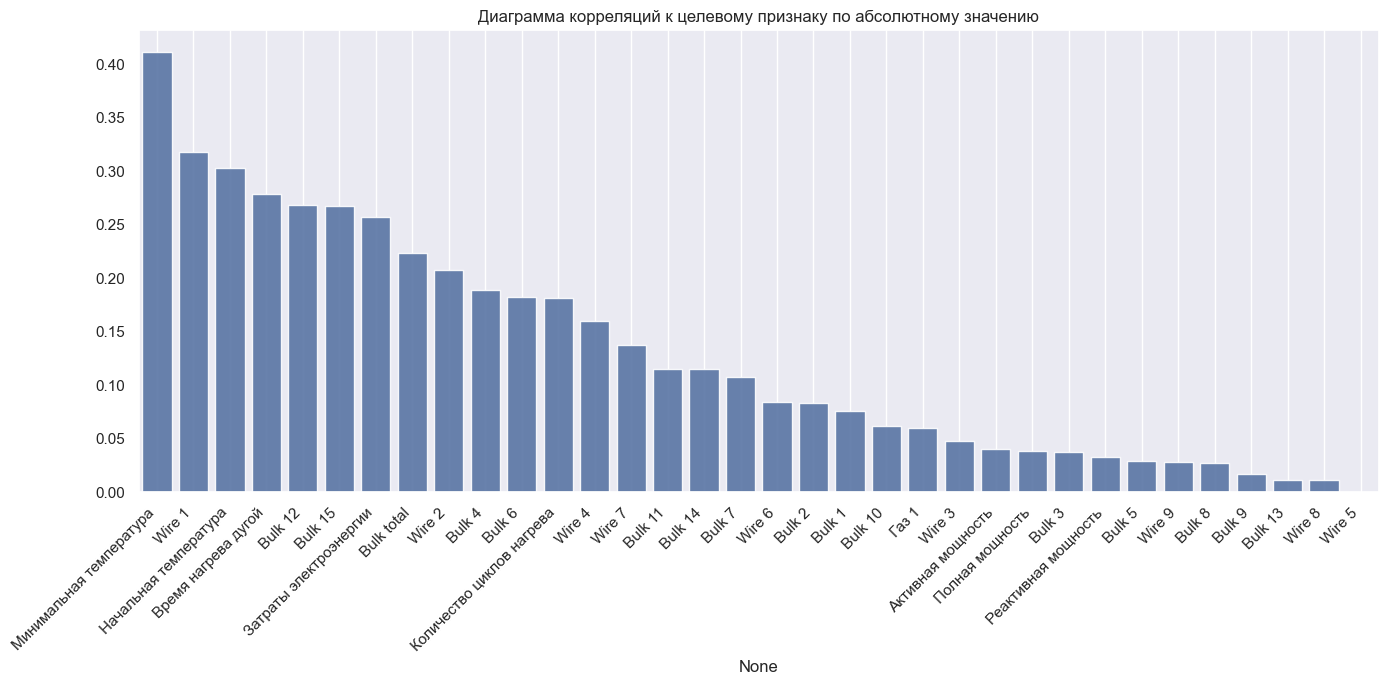

In [74]:
plt.figure(figsize=(16,6))
sns.barplot(x=corr_data.index, y=corr_data.values, color=sns.color_palette().as_hex()[0], alpha=0.9)
plt.title('Диаграмма корреляций к целевому признаку по абсолютному значению')
plt.grid()
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

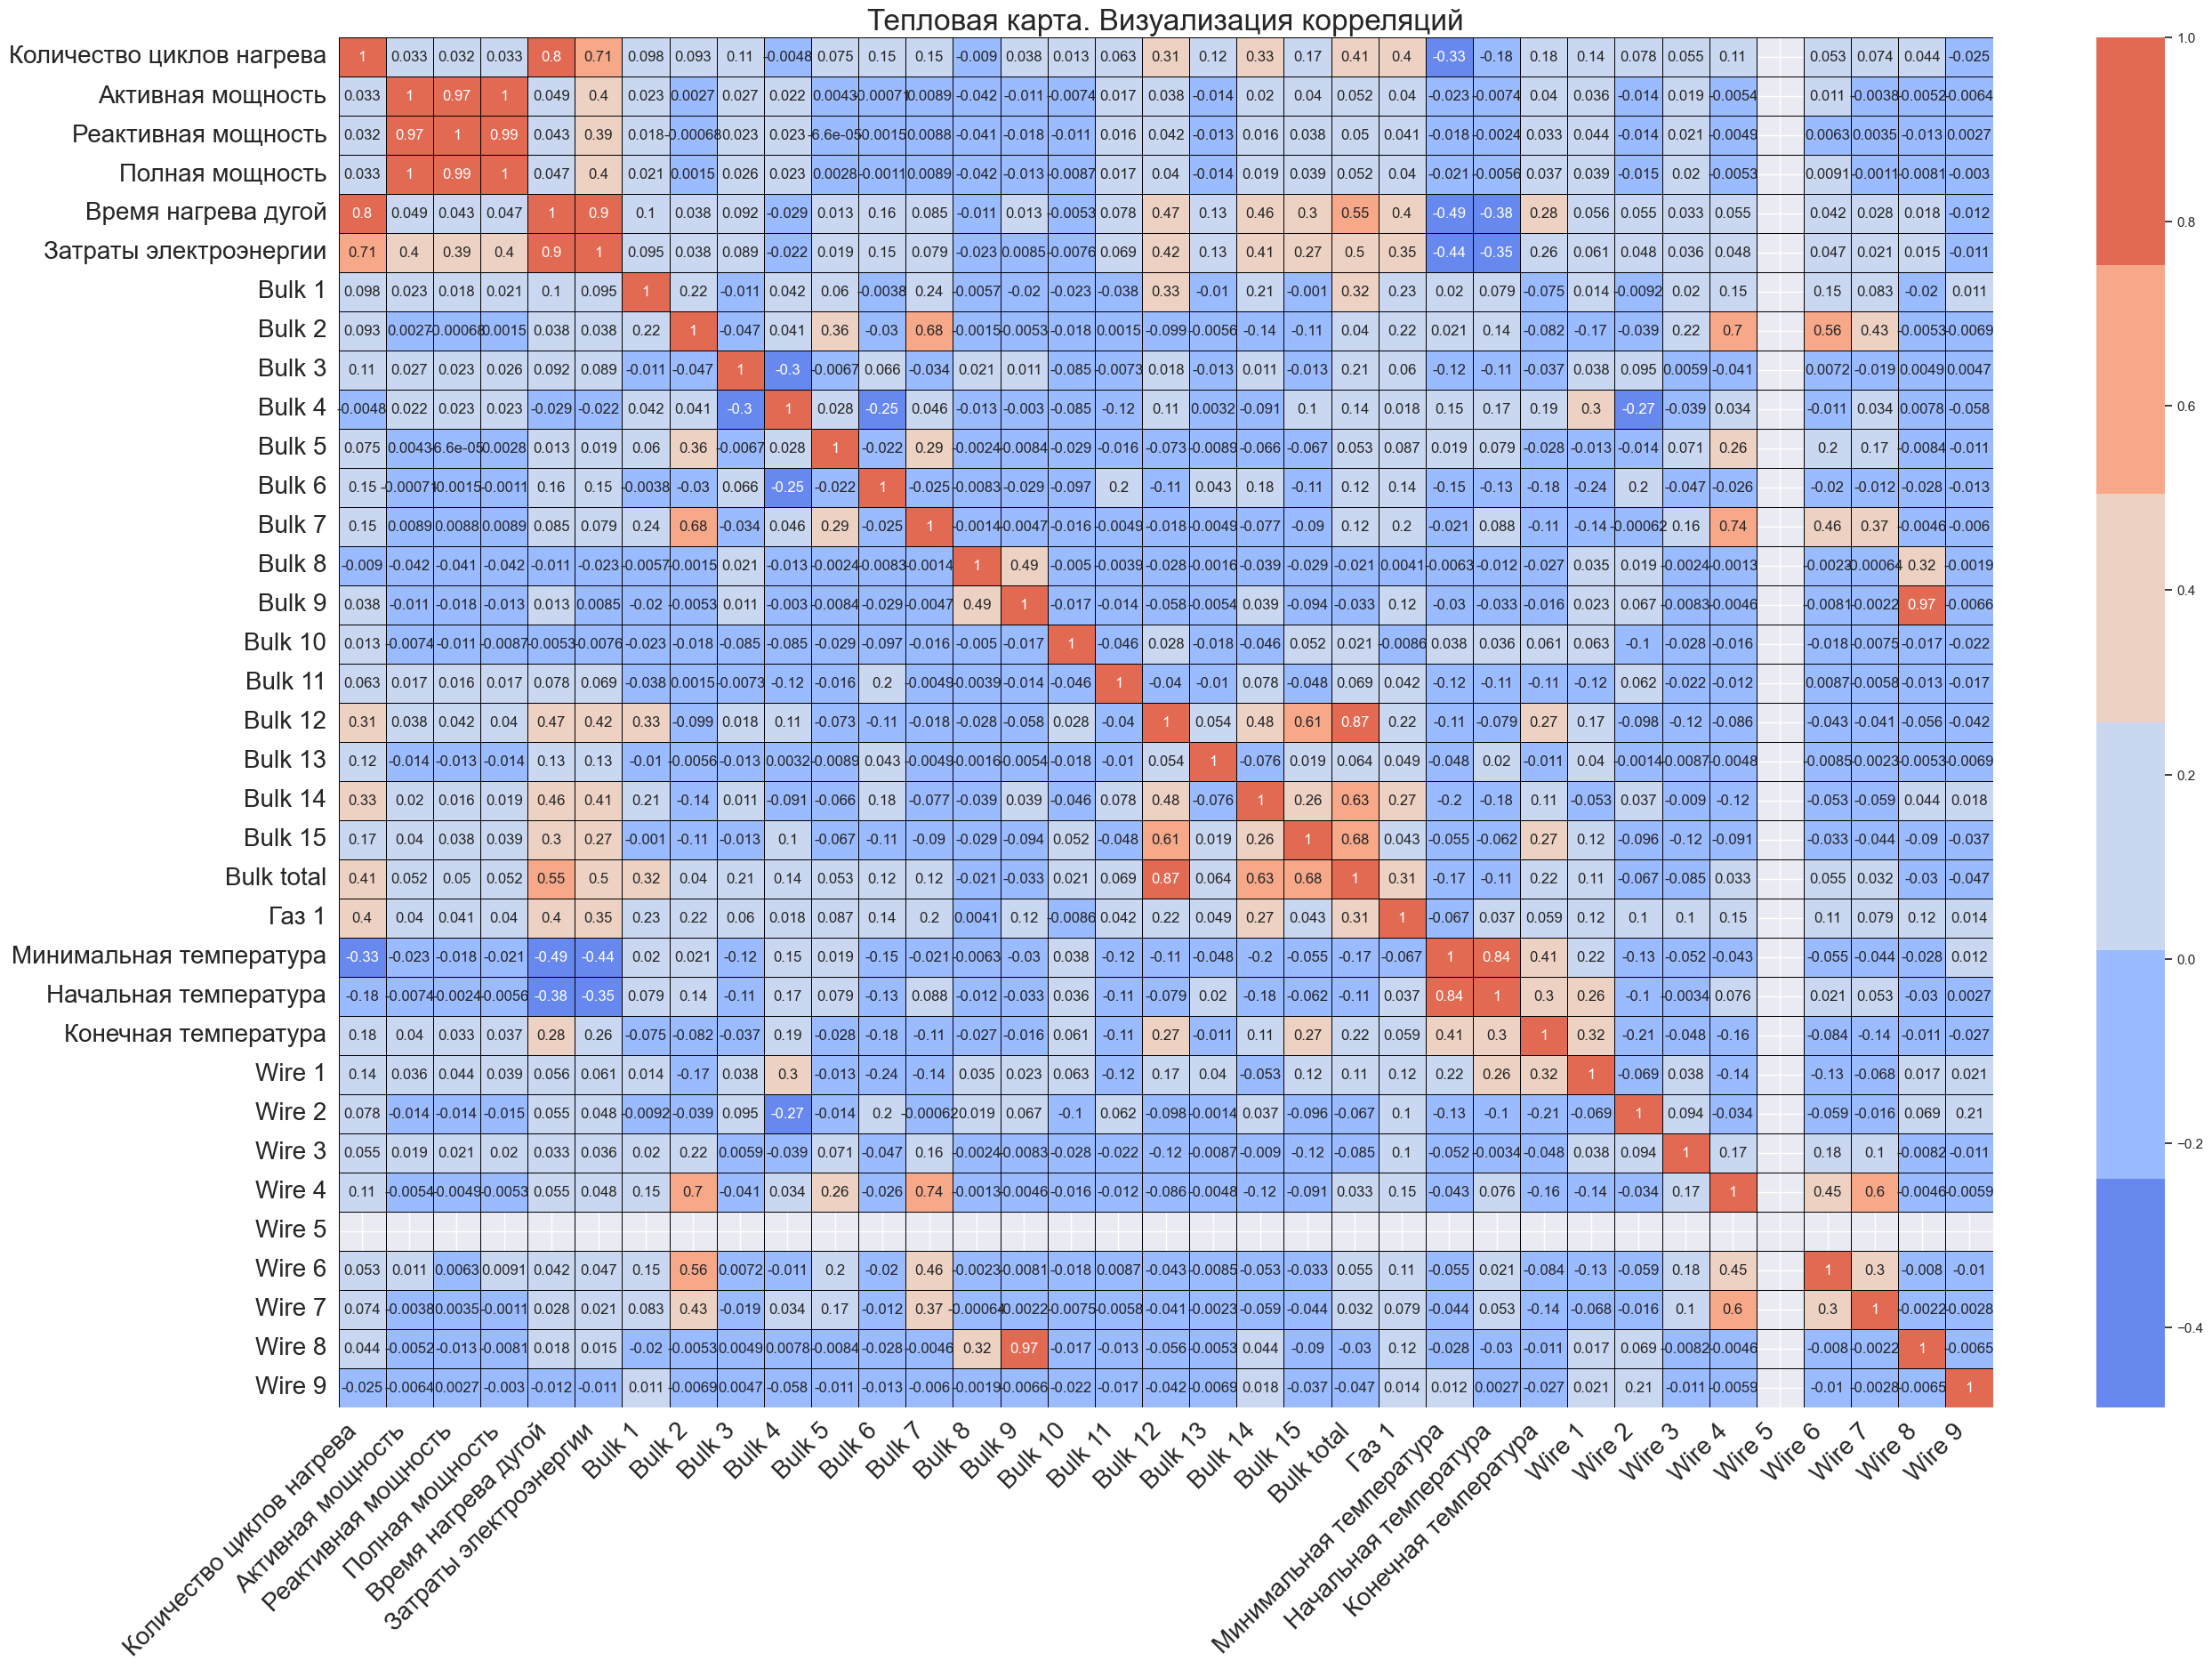

In [75]:
plt.figure(figsize=(30,20))
colormap = sns.color_palette('coolwarm')
chart = sns.heatmap(total.corr(), annot=True, cmap=colormap, linewidths=0.7, linecolor='black')
plt.title('Тепловая карта. Визуализация корреляций', fontsize=24)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right', fontsize=20)
plt.show()

Наблюдаем высокую корреляцию (коэффициент корреляции выше 0.9) у признаков: `Активная мощность`, `Реактивная мощность` и `Полная мощность`; `Время нагрева дугой` и `Затраты электроэнергии`; `Bulk 9` и `Wire 8`. Удалим перед обучением признаки `Реактивная мощность`, `Полная мощность`, `Затраты электроэнергии`, `Wire 8`, чтобы устранить мультиколлинеарность. 

In [76]:
total.columns

Index(['Количество циклов нагрева', 'Активная мощность', 'Реактивная мощность',
       'Полная мощность', 'Время нагрева дугой', 'Затраты электроэнергии',
       'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7',
       'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13',
       'Bulk 14', 'Bulk 15', 'Bulk total', 'Газ 1', 'Минимальная температура',
       'Начальная температура', 'Конечная температура', 'Wire 1', 'Wire 2',
       'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

**Выводы:**
- Был проведен исследовательский анализ данных после объединения таблиц. Изучена корреляция признаков. Определены признаки с высокой корреляцией (коэффициент корреляции выше 0.9) у признаков: `Активная мощность`, `Реактивная мощность` и `Полная мощность`; `Время нагрева дугой` и `Затраты электроэнергии`; `Bulk 9` и `Wire 8`. Удалим перед обучением признаки `Реактивная мощность`, `Полная мощность`, `Затраты электроэнергии`, `Wire 8`, чтобы устранить мультиколлинеарность. 

## Подготовка данных

In [77]:
total.head()

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Затраты электроэнергии,Bulk 1,Bulk 2,Bulk 3,Bulk 4,...,Конечная температура,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,
1,5,0.607346,0.428564,0.743747,1098.0,770.282114,0,0,0,43,...,1613,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.534852,0.363339,0.647087,811.0,481.760005,0,0,0,73,...,1602,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.812728,0.587491,1.003845,655.0,722.837668,0,0,0,34,...,1599,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.676622,0.514248,0.850010,741.0,683.455597,0,0,0,81,...,1625,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4,0.563238,0.421998,0.704245,869.0,512.169934,0,0,0,78,...,1602,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
X = total.drop(columns=['Конечная температура', 'Реактивная мощность', 
                        'Полная мощность', 'Wire 8', 'Затраты электроэнергии'], axis=1)
y = total['Конечная температура']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [80]:
print('Размер X_train:', X_train.shape)
print('Размер y_train:', y_train.shape)
print('Размер X_test:', X_test.shape)
print('Размер y_test:', y_test.shape)

Размер X_train: (1743, 30)
Размер y_train: (1743,)
Размер X_test: (582, 30)
Размер y_test: (582,)


**Выводы:**
- Реализована подготовка данных для обучения, датасеты разделены на тренировочную и тестовую выборки, исключены признаки с высокой корреляцией.

## Обучение моделей машинного обучения

### LinearRegression

In [81]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)

In [82]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaler, y_train)
y_train_pred = model_lr.predict(X_train_scaler)

mae_lr = mean_absolute_error(y_train, y_train_pred).round(2)
print ('Метрика модели LinearRegression на тренировочной выборке:', mae_lr)

Метрика модели LinearRegression на тренировочной выборке: 5.25


### CatBoost

In [83]:
#зададим модель и параметры
model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=False)

parameters = {
    'simple_ctr': ['Buckets', 'BinarizedTargetMeanValue', 'Counter'],
    'combinations_ctr': ['Buckets', 'BinarizedTargetMeanValue', 'Counter'],
    'learning_rate': [0.05, 0.08, 0.1, 0.5],
    'max_depth': range(5, 8),
    'iterations': [10, 50, 100]
}

gs = GridSearchCV(
    model,
    parameters,
    n_jobs=-1,
    cv=5,
    scoring='neg_mean_absolute_error'
)

In [84]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x29a786810>,
             n_jobs=-1,
             param_grid={'combinations_ctr': ['Buckets',
                                              'BinarizedTargetMeanValue',
                                              'Counter'],
                         'iterations': [10, 50, 100],
                         'learning_rate': [0.05, 0.08, 0.1, 0.5],
                         'max_depth': range(5, 8),
                         'simple_ctr': ['Buckets', 'BinarizedTargetMeanValue',
                                        'Counter']},
             scoring='neg_mean_absolute_error')

In [85]:
print('Лучшая модель:', gs.best_estimator_)
print('Лучшие гиперпараметры модели:', gs.best_params_)
print ('Метрика лучшей модели CatBoost при кросс-валидации:', abs(gs.best_score_.round(2)))

mae_cb = abs(gs.best_score_.round(2))

Лучшая модель: <catboost.core.CatBoostRegressor object at 0x29e640fd0>
Лучшие гиперпараметры модели: {'combinations_ctr': 'Buckets', 'iterations': 100, 'learning_rate': 0.1, 'max_depth': 7, 'simple_ctr': 'Buckets'}
Метрика лучшей модели CatBoost при кросс-валидации: 5.22


### LightGBM

In [86]:
#зададим модель и параметры
model = LGBMRegressor(random_state=RANDOM_STATE, verbose=-1)

parameters = {
    'num_leaves': range(8, 10),
    'max_depth': range(5, 8),
    'learning_rate': [0.05, 0.08, 0.1, 0.5],
    'n_estimators': [10, 50, 100]
}

gs = GridSearchCV(
    model,
    parameters,
    n_jobs=-1,
    cv=5,
    scoring='neg_mean_absolute_error'
)

In [87]:
gs.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42, verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.5],
                         'max_depth': range(5, 8),
                         'n_estimators': [10, 50, 100],
                         'num_leaves': range(8, 10)},
             scoring='neg_mean_absolute_error')

In [88]:
print('Лучшая модель:', gs.best_estimator_)
print('Лучшие гиперпараметры модели:', gs.best_params_)
print ('Метрика лучшей модели LightGBM при кросс-валидации:', abs(gs.best_score_.round(2)))

mae_lgbm = abs(gs.best_score_.round(2))

Лучшая модель: LGBMRegressor(max_depth=7, num_leaves=8, random_state=42, verbose=-1)
Лучшие гиперпараметры модели: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 8}
Метрика лучшей модели LightGBM при кросс-валидации: 5.16


### DecisionTreeRegressor

In [89]:
#зададим модель и параметры
model = DecisionTreeRegressor(random_state=RANDOM_STATE)

parameters = {
    'max_depth': range(1, 15),
    'min_samples_split': range(1, 15),
    'min_samples_leaf': range(1, 15),
}

rs = RandomizedSearchCV(
    model, 
    parameters, 
    cv=20,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

In [90]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=DecisionTreeRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 15),
                                        'min_samples_leaf': range(1, 15),
                                        'min_samples_split': range(1, 15)},
                   scoring='neg_mean_absolute_error')

In [91]:
print('Лучшая модель:', rs.best_estimator_)
print('Лучшие гиперпараметры модели:', rs.best_params_)
print ('Метрика лучшей модели DecisionTreeRegressor при кросс-валидации:', abs(rs.best_score_.round(2)))

mae_dt = abs(rs.best_score_.round(2))

Лучшая модель: DecisionTreeRegressor(max_depth=9, min_samples_leaf=11, min_samples_split=10,
                      random_state=42)
Лучшие гиперпараметры модели: {'min_samples_split': 10, 'min_samples_leaf': 11, 'max_depth': 9}
Метрика лучшей модели DecisionTreeRegressor при кросс-валидации: 6.16


### RandomForestRegressor

In [92]:
model = RandomForestRegressor(random_state=RANDOM_STATE)

parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 3, 4],
    'bootstrap': [True, False]
}

gs = GridSearchCV(
    model,
    parameters,
    n_jobs=-1,
    cv=5,
    scoring='neg_mean_absolute_error'
)

In [93]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_absolute_error')

In [94]:
print('Лучшая модель:', gs.best_estimator_)
print('Лучшие гиперпараметры модели:', gs.best_params_)
print ('Метрика лучшей модели RandomForestRegressor при кросс-валидации:', abs(gs.best_score_.round(2)))

mae_rf = abs(gs.best_score_.round(2))

Лучшая модель: RandomForestRegressor(max_depth=30, random_state=42)
Лучшие гиперпараметры модели: {'bootstrap': True, 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Метрика лучшей модели RandomForestRegressor при кросс-валидации: 5.32


**Выводы:**
- Обучены модели на тренировочных данных: `LinearRegression`, `CatBoost`, `LightGBM`, `DecisionTreeRegressor`, `RandomForestRegressor`. С помощью кросс-валидации был осуществлен подбор лучших гиперпараметров моделей.

## Выбор лучшей модели

Проверим полученные метрики при обучении.

In [95]:
data = {'MAE на тренировочной выборке':[mae_lr, mae_cb, mae_lgbm, mae_dt, mae_rf]}
index = ['LinearRegression', 'CatBoost', 'LightGBM', 'DecisionTreeRegressor', 'RandomForestRegressor']
result_metrics = pd.DataFrame(data=data, index=index)
result_metrics.sort_values(by='MAE на тренировочной выборке', ascending=True)

,MAE на тренировочной выборке
LightGBM,5.16
CatBoost,5.22
LinearRegression,5.25
RandomForestRegressor,5.32
DecisionTreeRegressor,6.16


Наилучшее значение метрики MAE у модели LGBM.

In [96]:
model = LGBMRegressor(num_leaves=8, random_state=16092024, 
                      verbose=-1, n_estimators=100, max_depth=7, learning_rate=0.1)
model.fit(X_train, y_train)

LGBMRegressor(max_depth=7, num_leaves=8, random_state=16092024, verbose=-1)

In [97]:
y_pred = model.predict(X_test)
mae_lgbm_test = round(mean_absolute_error(y_test, y_pred), 2)
print('MAE LinearRegression на тестовой выборке = ', mae_lgbm_test)

MAE LinearRegression на тестовой выборке =  5.15


Построим график важности признаков.

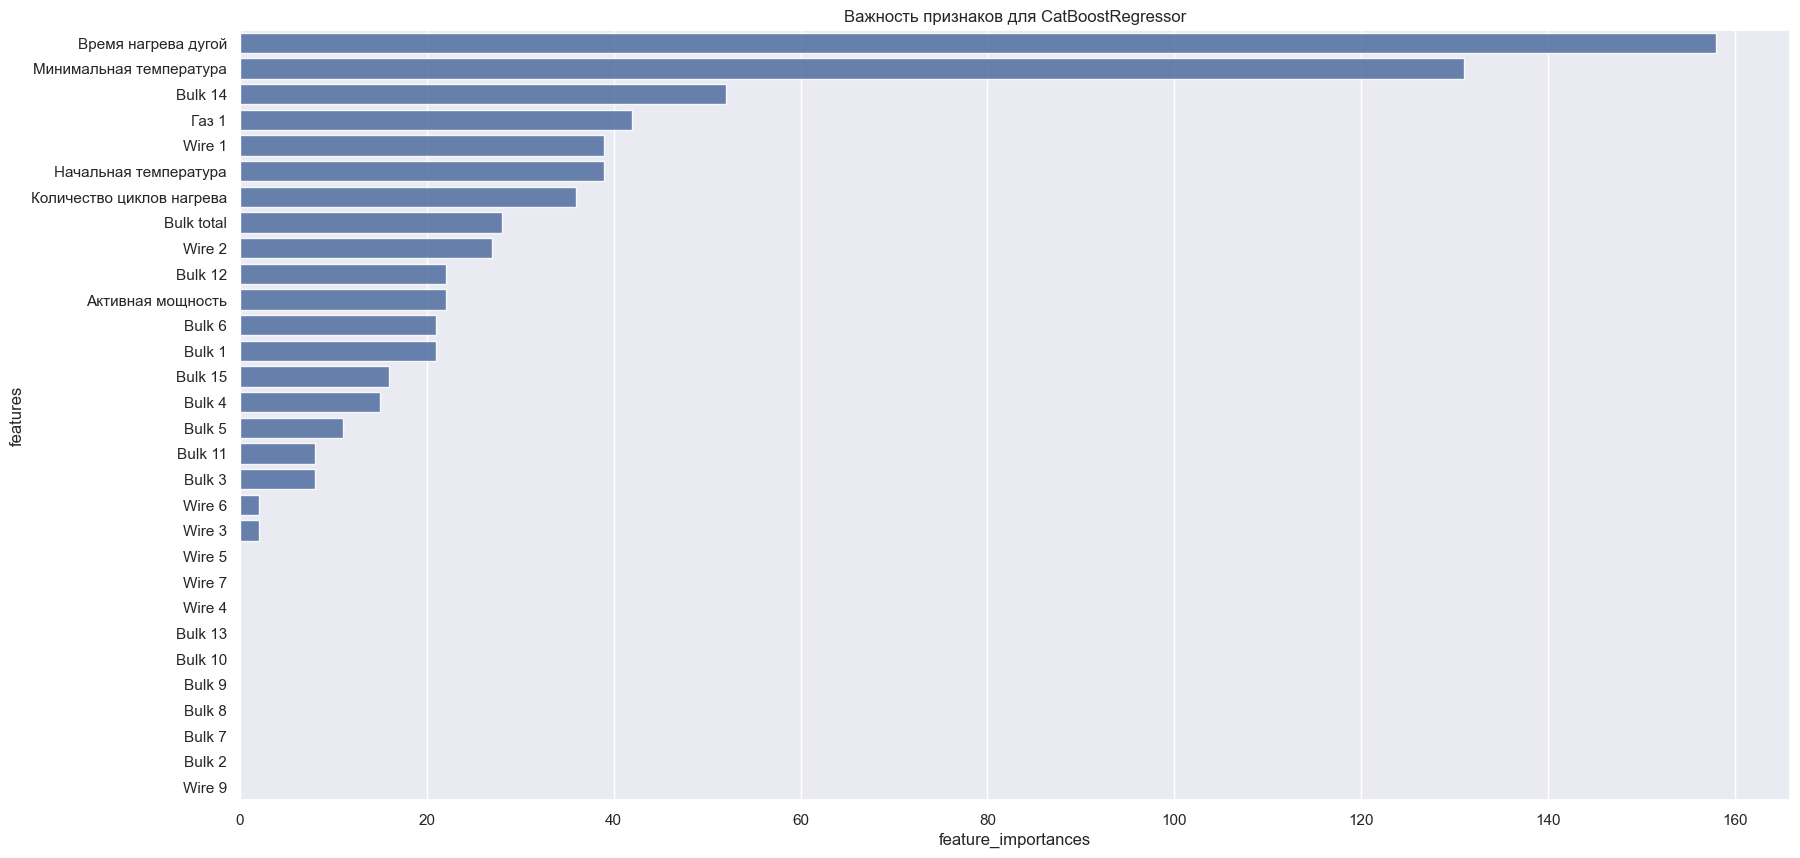

In [98]:
plot_data = {
    'features': X_test.columns,
    'feature_importances': model.feature_importances_,
}
plot_data = pd.DataFrame(plot_data)
plot_data.sort_values(by='feature_importances', ascending=False, inplace=True)
plt.figure(figsize=(20, 10))
sns.barplot(x=plot_data['feature_importances'], y=plot_data['features'],
            color=sns.color_palette().as_hex()[0], alpha=0.9)
plt.title('Важность признаков для CatBoostRegressor')
plt.show()

Проверим модели на адекватность с помощью константной модели.

In [99]:
dummy_regr = DummyRegressor(strategy='median')
dummy_regr.fit(X_train_scaler, y_train)

DummyRegressor(strategy='median')

In [100]:
X_test_scaler = scaler.fit_transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)
y_test_pred = dummy_regr.predict(X_test_scaler)

In [101]:
mae_dummy_regr = mean_absolute_error(y_test, y_test_pred).round(2)
print ('Метрика модели DummyRegressor на тестовой выборке:', mae_dummy_regr)

Метрика модели DummyRegressor на тестовой выборке: 8.32


Качество константной модели хуже, чем лучшей из выбранных выше.

**Выводы:**
- Метрики обученных моделей на тренировочных данных:
  - MAE LinearRegression = 5.25
  - MAE CatBoost = 5.22
  - MAE LightGBM = 5.16
  - MAE DecisionTreeRegressor = 6.16
  - MAE RandomForestRegressor = 5.32
- Наилучшее значение метрики MAE наблюдается у модели LightGBM. Тестирование данной модели подтвердило ее качество. Метрика MAE LightGBM на тестовых данных = 5.15. Таким образом, была выбрана лучшая модель - LightGBM.
- Был проведен анализ важности признаков. 10 наиболее важных признаков для модели: `Время нагрева дугой`, `Минимальная температура`, `Bulk 14`, `Газ 1'`, `'Wire 1`, `Начальная температура`, `Количество циклов нагрева`, `Bulk total`, `Wire 2`, `Bulk 12`.

## Общий вывод и рекомендации заказчику

- Был произведен импорт библиотек и загрузка данных из датасетов `data_arc_new`, `data_bulk_new`, `data_bulk_time_new`, `data_gas_new`, `data_temp_new`, `data_wire_new` и `data_wire_time_new`. Названия столбцов достаточно информативны и не требуют переименования.
- Для каждого датасета `data_arc_new`, `data_bulk_new`, `data_bulk_time_new`, `data_gas_new`, `data_temp_new`, `data_wire_new`, `data_wire_time_new` был проведен обзор и анализ данных, выполнена проверка на пропуски и их обработка, данные приведены к корректным типам.
- В датасете `data_arc_new` содержится 14876 записей. Пропуски в данных отсутствуют. Данные были приведены к корректному типу. С целью дальнейщего обучения были сгенерированы новые признаки: `Полная мощность`, `Время нагрева дугой`, `Затраты электроэнергии`. Каждому номеру партии соответствует несколько циклов. Данные были сгруппированы по партиям, для каждой партии было посчитано количество циклов, среднее значение мощности и полная затраченная электроэнергия. Были исключены выбросы по аномальным значениям признаков `Реактивная мощность` и `Время нагрева дугой`. 
- По датасету `data_temp_new` были получены признаки `Время начального замера температуры` и `Время последнего замера температуры` для каждой партии.
- В замерах температуры имелись пропуски. Были удалены те партии, в которых наблюдались пропуски в замерах температуры, а также партии с одним циклом замера температуры и партии с аномальными значениями по температурам. Для каждой партии были определены признаки `Начальная температура`, `Минимальная температура`, `Конечная температура` (целевой признак). 
- В датасете `data_bulk_new` был введен дополнительный признак `Bulk total` общего объема добавленного материала.
- Был создан общий датасет с данными о времени. Операция замера температуры в начале и в конце каждого этапа должны быть первой и последней операцией, соответственно. С помощью датасета была выполнена проверка данных на нарушение времени замера температур. Партии с нарушением времени замера температуры в начале или конце каждого этапа не обнаружены.
- Был создан общий датасет с данными для обучения и предсказания по ключу `key`. В итоговый датасет попали признаки: `Количество циклов нагрева`, `Активная мощность`, `Реактивная мощность`, `Полная мощность`, `Время нагрева дугой`, `Затраты электроэнергии`, `Bulk XXX` (объем добавленного материала), `Bulk total` (общий объем добавленного материала), `Газ 1` (объём подаваемого газа), `Начальная температура`, `Минимальная температура`, `Конечная температура`, `Wire XXX` (объём подаваемых проволочных материалов).
- Был проведен исследовательский анализ данных после объединения таблиц. Изучена корреляция признаков. Определены признаки с высокой корреляцией (коэффициент корреляции выше 0.9) у признаков: `Активная мощность`, `Реактивная мощность` и `Полная мощность`; `Время нагрева дугой` и `Затраты электроэнергии`; `Bulk 9` и `Wire 8`. Удалим перед обучением признаки `Реактивная мощность`, `Полная мощность`, `Затраты электроэнергии`, `Wire 8`, чтобы устранить мультиколлинеарность. 
- Реализована подготовка данных для обучения, датасеты разделены на тренировочную и тестовую выборки, исключены признаки с высокой корреляцией.
- Обучены модели на тренировочных данных: `LinearRegression`, `CatBoost`, `LightGBM`, `DecisionTreeRegressor`, `RandomForestRegressor`. С помощью кросс-валидации был осуществлен подбор лучших гиперпараметров моделей.
- Метрики обученных моделей на тренировочных данных:
  - MAE LinearRegression = 5.25
  - MAE CatBoost = 5.22
  - MAE LightGBM = 5.16
  - MAE DecisionTreeRegressor = 6.16
  - MAE RandomForestRegressor = 5.32
- Наилучшее значение метрики MAE наблюдается у модели LightGBM. Тестирование данной модели подтвердило ее качество. Метрика MAE LightGBM на тестовых данных = 5.15. Таким образом, была выбрана лучшая модель - LightGBM.
- Был проведен анализ важности признаков. 10 наиболее важных признаков для модели: `Время нагрева дугой`, `Минимальная температура`, `Bulk 14`, `Газ 1'`, `'Wire 1`, `Начальная температура`, `Количество циклов нагрева`, `Bulk total`, `Wire 2`, `Bulk 12`.
- Обученная модель LightGBM с подобранными гиперпараметрами рекомендована к использованию для прогнозирования температуры стали.